In [1]:
pwd

'/home/wsuser/work'

In [6]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_5e75d1c2d8e44416950574ee27be2dd4 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ZEvxvjgHliQnqFsXUbgsJXx4-zn4um0rOrStUui4S0pb',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

streaming_body_1 = client_5e75d1c2d8e44416950574ee27be2dd4.get_object(Bucket='animalclassification-donotdelete-pr-qrrowepz6pbx0f', Key='Animal_Dataset.zip')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [7]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_1.read()), 'r')
file_path = unzip.namelist()
for path in file_path:
    unzip.extract(path)

In [8]:
ls -1

dataset/


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255, zoom_range = 0.2, horizontal_flip = True, vertical_flip = False)

In [11]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
pwd

'/home/wsuser/work'

In [13]:
ls

dataset/


In [14]:
cd /home/wsuser/work/dataset

/home/wsuser/work/dataset


In [15]:
ls

Testing/  Training/


In [16]:
x_train = train_datagen.flow_from_directory(r"/home/wsuser/work/dataset/Training", target_size = (64,64), class_mode = 'categorical', batch_size = 24)

Found 1238 images belonging to 4 classes.


In [17]:
x_test = test_datagen.flow_from_directory(r"/home/wsuser/work/dataset/Testing", target_size = (64,64), class_mode = 'categorical', batch_size = 24)

Found 326 images belonging to 4 classes.


In [18]:
len(x_test)

14

In [19]:
326/24

13.583333333333334

In [20]:
x_train.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

# CNN 

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten

In [22]:
model = Sequential()

In [23]:
model.add(Convolution2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [24]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [25]:
model.add(Flatten())

In [26]:
model.add(Dense(300, activation = 'relu'))
model.add(Dense(150, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

In [27]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [28]:
model.fit_generator(x_train, steps_per_epoch = len(x_train), epochs = 10, validation_data = x_test, validation_steps = len(x_test))

/tmp/wsuser/ipykernel_164/3944985481.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train, steps_per_epoch = len(x_train), epochs = 10, validation_data = x_test, validation_steps = len(x_test))


Epoch 1/10
52/52 [==============================] - 11s 207ms/step - loss: 1.5512 - accuracy: 0.3724 - val_loss: 1.1265 - val_accuracy: 0.5828
Epoch 2/10
52/52 [==============================] - 11s 204ms/step - loss: 0.9880 - accuracy: 0.5913 - val_loss: 0.9129 - val_accuracy: 0.6043
Epoch 3/10
52/52 [==============================] - 11s 201ms/step - loss: 0.7693 - accuracy: 0.6971 - val_loss: 0.5113 - val_accuracy: 0.8160
Epoch 4/10
52/52 [==============================] - 11s 203ms/step - loss: 0.6572 - accuracy: 0.7447 - val_loss: 0.5065 - val_accuracy: 0.8067
Epoch 5/10
52/52 [==============================] - 11s 200ms/step - loss: 0.5704 - accuracy: 0.7674 - val_loss: 0.3666 - val_accuracy: 0.8650
Epoch 6/10
52/52 [==============================] - 11s 202ms/step - loss: 0.4900 - accuracy: 0.8142 - val_loss: 0.5787 - val_accuracy: 0.7761
Epoch 7/10
52/52 [==============================] - 11s 200ms/step - loss: 0.4260 - accuracy: 0.8304 - val_loss: 0.4042 - val_accuracy: 0.8558

In [29]:
model.save('animal.h5')

# Test Model

In [30]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [31]:
model = load_model('animal.h5')

In [32]:
img = image.load_img(r"/home/wsuser/work/dataset/Testing/elephants/images (43).jpeg", target_size = (64, 64))

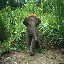

In [33]:
img

In [34]:
x = image.img_to_array(img)

In [35]:
x

array([[[ 40.,  60.,  51.],
        [ 35.,  55.,  46.],
        [ 16.,  36.,  27.],
        ...,
        [ 70., 112.,  48.],
        [ 60., 101.,  45.],
        [ 68., 105.,  61.]],

       [[  9.,  29.,  20.],
        [ 21.,  41.,  32.],
        [ 67.,  87.,  78.],
        ...,
        [ 66., 108.,  44.],
        [ 58.,  99.,  43.],
        [ 81., 117.,  79.]],

       [[ 16.,  36.,  25.],
        [ 34.,  54.,  43.],
        [ 29.,  49.,  38.],
        ...,
        [ 44.,  86.,  22.],
        [ 51.,  91.,  39.],
        [119., 157., 106.]],

       ...,

       [[103.,  99.,  88.],
        [102.,  99.,  84.],
        [115., 112.,  95.],
        ...,
        [113., 110.,  93.],
        [123., 121., 106.],
        [129., 124., 105.]],

       [[ 54.,  49.,  45.],
        [ 53.,  48.,  42.],
        [ 83.,  79.,  70.],
        ...,
        [129., 123., 109.],
        [107., 103.,  91.],
        [109., 104.,  85.]],

       [[ 61.,  69.,  56.],
        [ 76.,  81.,  75.],
        [ 92.,  

In [36]:
x.ndim

3

In [37]:
x = np.expand_dims(x, axis = 0)

In [38]:
x.ndim

4

In [39]:
pred = np.argmax(model.predict(x), axis = 1)

In [40]:
pred

array([2])

In [41]:
index = ['bears', 'crows', 'elephants', 'rats']

In [42]:
index[pred[0]]

'elephants'

In [45]:
img = image.load_img(r"/home/wsuser/work/dataset/Testing/elephants/images (42).jpeg", target_size = (64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
pred = np.argmax(model.predict(x), axis = 1)
index[pred[0]]

'elephants'

# IBM Deployment

In [46]:
!pip install watson-machine-learning-client

     |████████████████████████████████| 538 kB 20.2 MB/s eta 0:00:01


In [63]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url" : "https://us-south.ml.cloud.ibm.com",
    "apikey" : "0aXJZ2Tv6RwZgFeMU1URxNZ2aWkG5Eu3X5yTfGskPsOz"
}

In [64]:
client = APIClient(wml_credentials)

In [65]:
client

In [66]:
def uid_space_name(client, Animal_Dep): # or guid
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name'] == Animal_Dep)['metadata']['id'])

In [67]:
space_uid = uid_space_name(client, 'Animal_Dep') # or guid
print(space_uid)

dfdcb4f2-cfa2-4886-96ae-e8ea204f9918


In [68]:
client.set.default_space(space_uid)

'SUCCESS'

In [59]:
client.software_specifications.list(200)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1

In [70]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')

In [71]:
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [72]:
ls

animal.h5  Testing/  Training/


In [73]:
!tar -zcvf animal.tgz animal.h5

animal.h5


In [74]:
ls

animal.h5  animal.tgz  Testing/  Training/


In [77]:
import tensorflow as tf
tf.__version__

'2.7.2'

In [78]:
model_details = client.repository.store_model(model = 'animal.tgz', 
meta_props = {
            client.repository.ModelMetaNames.NAME:"AnimalCNNModel",
            client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
            client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [79]:
model_id = client.repository.get_model_id(model_details)

In [80]:
model_id

'381f3cb7-7cc5-40bc-8cd2-2a7f382c1c17'

In [81]:
ls

animal.h5  animal.tgz  Testing/  Training/


In [82]:
client.repository.download(model_id, 'animalcnn.tgz')

Successfully saved model content to file: 'animalcnn.tgz'


'/home/wsuser/work/dataset/animalcnn.tgz'

In [83]:
ls

animalcnn.tgz  animal.h5  animal.tgz  Testing/  Training/
